In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline

import seaborn as sns

In [2]:
import tensorflow as tf
tf.__version__

'2.16.1'

Dataset

In [3]:
train_csv_path: str = 'train.csv'

data: pd.DataFrame = pd.read_csv(train_csv_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Watch the data style

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Remove any columns that aren't needed from the dataset.

In [5]:
data = data.drop(['PassengerId','Name','Ticket','Cabin','Parch'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


Checking null values

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [7]:
data.dropna(subset=['Embarked'], inplace=True)

Filling null values

In [8]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

/var/folders/b4/lsbtbcr574vch40w82c46ghw0000gn/T/ipykernel_54135/1511642622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace = True)


In [9]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [10]:
sex_col = data['Sex'] == 'male'
sex_col = sex_col.astype('int32')


data = data.drop(['Sex'],axis=1)

data['Sex'] = sex_col

data.head()

,Survived,Pclass,Age,SibSp,Fare,Embarked,Sex
0,0,3,22.0,1,7.2500,S,1
1,1,1,38.0,1,71.2833,C,0
2,1,3,26.0,0,7.9250,S,0
3,1,1,35.0,1,53.1000,S,0
4,0,3,35.0,0,8.0500,S,1


In [11]:
data = pd.get_dummies(data, columns = ['Embarked'])
data.head()

,Survived,Pclass,Age,SibSp,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,1,False,False,True
1,1,1,38.0,1,71.2833,0,True,False,False
2,1,3,26.0,0,7.9250,0,False,False,True
3,1,1,35.0,1,53.1000,0,False,False,True
4,0,3,35.0,0,8.0500,1,False,False,True


Split Data

In [12]:
X = data.drop('Survived', axis=1).to_numpy()
y = data['Survived'].to_numpy()

In [13]:
X.shape, y.shape

((889, 8), (889,))

Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Splitting traning set

In [15]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((711, 8), (178, 8), (711,), (178,))

Building and Training model

In [16]:

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(9, activation='relu'),
           tf.keras.layers.Dense(15, activation='relu'),
           tf.keras.layers.Dense(50, activation='relu'),
           tf.keras.layers.Dense(2, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

history = model_1.fit(X_train, 
                      tf.one_hot(y_train, depth=2), 
                      epochs=250,
                      verbose = 1,
                      validation_data=(X_valid, tf.one_hot(y_valid, depth=2)))

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3793 - loss: 0.7032 - val_accuracy: 0.4888 - val_loss: 0.6946
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4791 - loss: 0.6970 - val_accuracy: 0.5843 - val_loss: 0.6893
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5889 - loss: 0.6916 - val_accuracy: 0.6798 - val_loss: 0.6845
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6635 - loss: 0.6868 - val_accuracy: 0.7584 - val_loss: 0.6800
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7193 - loss: 0.6823 - val_accuracy: 0.7809 - val_loss: 0.6759
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7311 - loss: 0.6781 - val_accuracy: 0.7978 - val_loss: 0.6720
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7292 - loss: 0.6741 - val_accuracy: 0.7921 - val_loss: 0.6681
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7362 - loss: 0.6702 - val_accuracy: 0.7865 - v

In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │            81 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,401 (13.29 KB)

 Trainable params: 1,133 (4.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,268 (8.86 KB)

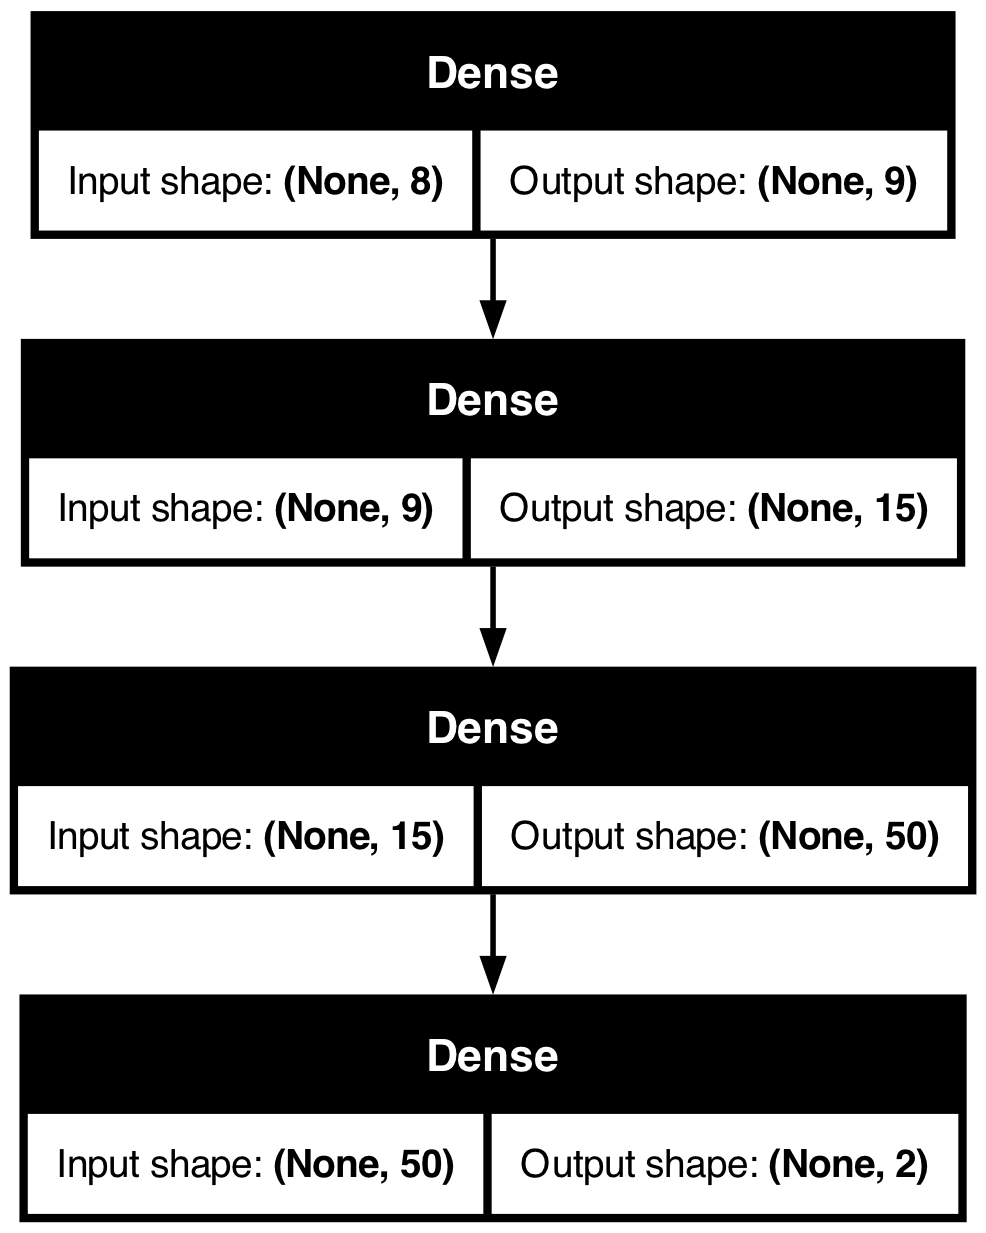

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

Test

In [19]:
test_dataset = pd.read_csv('test.csv')

In [20]:
test_passengerIds = test_dataset['PassengerId'].values
test_dataset=test_dataset.drop(['PassengerId', 'Name','Ticket','Cabin', 'Parch'],axis=1)

In [21]:
test_dataset.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S


In [22]:
test_dataset.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Fare         1
Embarked     0
dtype: int64

In [24]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [25]:
test_dataset['Age'].fillna(test_dataset['Age'].mean(),inplace = True)
test_dataset['Fare'].fillna(test_dataset['Fare'].mean(),inplace = True)
test_dataset.isna().sum()

/var/folders/b4/lsbtbcr574vch40w82c46ghw0000gn/T/ipykernel_54135/326285714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Age'].fillna(test_dataset['Age'].mean(),inplace = True)
/var/folders/b4/lsbtbcr574vch40w82c46ghw0000gn/T/ipykernel_54135/326285714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [26]:
sex_col = test_dataset['Sex'] == 'male'
sex_col = sex_col.astype('int32')


test_dataset = test_dataset.drop(['Sex'],axis=1)

test_dataset['Sex'] = sex_col

test_dataset.head()

,Pclass,Age,SibSp,Fare,Embarked,Sex
0,3,34.5,0,7.8292,Q,1
1,3,47.0,1,7.0000,S,0
2,2,62.0,0,9.6875,Q,1
3,3,27.0,0,8.6625,S,1
4,3,22.0,1,12.2875,S,0


In [27]:
test_dataset = pd.get_dummies(test_dataset, columns = ['Embarked'])
test_dataset.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,7.8292,1,False,True,False
1,3,47.0,1,7.0000,0,False,False,True
2,2,62.0,0,9.6875,1,False,True,False
3,3,27.0,0,8.6625,1,False,False,True
4,3,22.0,1,12.2875,0,False,False,True


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_dataset = sc.fit_transform(test_dataset)

In [29]:
y_pred = model_1.predict(test_dataset).argmax(axis = 1)
y_pred.shape

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(418,)

In [30]:
test_passengerIds.shape

(418,)

In [31]:
output = pd.DataFrame({'PassengerId':test_passengerIds, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [32]:
data.head()

,Survived,Pclass,Age,SibSp,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,1,False,False,True
1,1,1,38.0,1,71.2833,0,True,False,False
2,1,3,26.0,0,7.9250,0,False,False,True
3,1,1,35.0,1,53.1000,0,False,False,True
4,0,3,35.0,0,8.0500,1,False,False,True


In [33]:
data2 = data.drop(['Survived'],axis = 1)

In [34]:
data2.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,1,False,False,True
1,1,38.0,1,71.2833,0,True,False,False
2,3,26.0,0,7.9250,0,False,False,True
3,1,35.0,1,53.1000,0,False,False,True
4,3,35.0,0,8.0500,1,False,False,True


In [39]:
import numpy as np

data_values_float32 = data2.values.astype(np.float32)
predst = model_1.predict(data_values_float32).argmax(axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


In [40]:
predst.shape

(889,)

In [41]:
z = data['Survived']

In [42]:
print(classification_report(z,predst))

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       549
           1       0.72      0.15      0.25       340

    accuracy                           0.65       889
   macro avg       0.68      0.56      0.51       889
weighted avg       0.68      0.65      0.57       889

